# data prepare

In [1]:
import pandas as pd
from PIL import Image
import torch

In [2]:
data = pd.read_csv('./data/list_attr_celeba.txt', sep="\s*", header=0)
partition = pd.read_csv('./data/list_eval_partition.txt', sep="\s*", header=None)

/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
partition.columns = ["filename", "file_cate"]
data = data.merge(partition, on = "filename", how = "left")

In [4]:
print(data.columns)

Index(['filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'file_cate'],
      dtype='object')


In [5]:
data.to_csv("./data/list_merge_attr_celeba.csv", index = False)

In [6]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')#将图片转换为RGB格式。

In [7]:
picture_data1=pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/img_align_celeba/000001.jpg')

In [8]:
import numpy as np
np.array(picture_data1).shape

(218, 178, 3)

In [9]:
from torch.utils.data import Dataset, DataLoader 
import os
class myDataset(Dataset):
    def __init__(self, loadPath, transform, data_category = 0): #r'home/tongqing.li/lesson/pytorch/MNIST_data/MNIST/processed/training.pt'
        super(myDataset, self).__init__()
        self.data = pd.read_csv(loadPath)
        self.data = self.data[self.data["file_cate"] == data_category]
        self.transform = transform
        
    def __getitem__(self, index):
        #Heavy_Makeup，Male，Wearing_Earrings，Wearing_Necklace，Wearing_Necktie
        picture = pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/img_align_celeba/' + self.data.iloc[index]["filename"])
        label = self.data.iloc[index][["Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necktie"]]
        for i in ["Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necktie"]:
            if (label.loc[i] == -1):
                label.loc[i] = 0
        label = torch.tensor(label)
        picture = self.transform(picture)
        return (picture, label.long())
    
    def __len__(self):
        return self.data.shape[0]

In [10]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Resize((224,224)), transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

train_face_dataset = myDataset("./data/list_merge_attr_celeba.csv", data_category = 0, transform = transform)
valid_face_dataset = myDataset("./data/list_merge_attr_celeba.csv", data_category = 1, transform = transform)
test_face_dataset = myDataset("./data/list_merge_attr_celeba.csv", data_category = 2, transform = transform)

In [11]:
train_face_dataset.__getitem__(0)[1].shape

torch.Size([5])

In [12]:
batch_size = 16
num_workers = 4

In [13]:
train_face_loader = DataLoader(train_face_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers, pin_memory=True)
valid_face_loader = DataLoader(valid_face_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers, pin_memory=True)
test_face_loader = DataLoader(test_face_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers, pin_memory=True)

In [23]:
import torch
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class fc_block(nn.Module):
    def __init__(self, inplanes, planes, drop_rate=0.15):
        super(fc_block, self).__init__()
        self.fc = nn.Linear(inplanes, planes)
        self.bn = nn.BatchNorm1d(planes)
        if drop_rate > 0:
            self.dropout = nn.Dropout(drop_rate)
        self.relu = nn.ReLU(inplace=True)
        self.drop_rate = drop_rate

    def forward(self, x):
        x = self.fc(x)
        x = self.bn(x)
        if self.drop_rate > 0:
            x = self.dropout(x)
        x = self.relu(x)
        return x

class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None, num_attributes = 5):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, 512)
        for i in range(num_attributes):
            setattr(self, 'classifier' + str(i).zfill(2), nn.Sequential(fc_block(512, 128), nn.Linear(128, 2)))
        self.num_attributes = num_attributes

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        y = []
        for i in range(self.num_attributes):
            classifier = getattr(self, 'classifier' + str(i).zfill(2))
            y.append(classifier(x))

        return y

    def forward(self, x):
        return self._forward_impl(x)


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch], progress=progress)
        model.load_state_dict(state_dict)
    return model


def resnet18(pretrained=False, progress=True, **kwargs):
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)


def resnet34(pretrained=False, progress=True, **kwargs):
    r"""ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet50(pretrained=False, progress=True, **kwargs):
    r"""ResNet-50 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet50', Bottleneck, [3, 4, 6, 3], pretrained, progress,
                   **kwargs)


def resnet101(pretrained=False, progress=True, **kwargs):
    r"""ResNet-101 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet101', Bottleneck, [3, 4, 23, 3], pretrained, progress,
                   **kwargs)


def resnet152(pretrained=False, progress=True, **kwargs):
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)


def resnext50_32x4d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-50 32x4d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 4
    return _resnet('resnext50_32x4d', Bottleneck, [3, 4, 6, 3], pretrained, progress, **kwargs)


def resnext101_32x8d(pretrained=False, progress=True, **kwargs):
    r"""ResNeXt-101 32x8d model from
    `"Aggregated Residual Transformation for Deep Neural Networks" <https://arxiv.org/pdf/1611.05431.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['groups'] = 32
    kwargs['width_per_group'] = 8
    return _resnet('resnext101_32x8d', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def wide_resnet50_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-50-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet50_2', Bottleneck, [3, 4, 6, 3],
                   pretrained, progress, **kwargs)


def wide_resnet101_2(pretrained=False, progress=True, **kwargs):
    r"""Wide ResNet-101-2 model from
    `"Wide Residual Networks" <https://arxiv.org/pdf/1605.07146.pdf>`_
    The model is the same as ResNet except for the bottleneck number of channels
    which is twice larger in every block. The number of channels in outer 1x1
    convolutions is the same, e.g. last block in ResNet-50 has 2048-512-2048
    channels, and in Wide ResNet-50-2 has 2048-1024-2048.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    kwargs['width_per_group'] = 64 * 2
    return _resnet('wide_resnet101_2', Bottleneck, [3, 4, 23, 3],
                   pretrained, progress, **kwargs)


def ResNeXt29_2x64d():
    return ResNeXt(num_blocks=[3,3,3], cardinality=2, bottleneck_width=64)

def ResNeXt29_4x64d():
    return ResNeXt(num_blocks=[3,3,3], cardinality=4, bottleneck_width=64)

def ResNeXt29_32x4d():
    return ResNeXt(num_blocks=[3,3,3], cardinality=32, bottleneck_width=4)

def resnext50(pretrained=True, **kwargs):
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        init_pretrained_weights(model)
    return model

def test_resnext():
    net = ResNeXt29_2x64d()
    x = torch.randn(1,3,32,32)
    y = net(x)
    print(y.size())
    
    
    
def init_pretrained_weights(model):
    """
    Initialize model with pretrained weights.
    Layers that don't match with pretrained layers in name or size are kept unchanged.
    """
    pretrain_dict = torch.hub.load('pytorch/vision:v0.6.0', 'resnext50_32x4d', pretrained=True).state_dict()
    model_dict = model.state_dict()
    pretrain_dict = {k: v for k, v in pretrain_dict.items() if k in model_dict and model_dict[k].size() == v.size()}
    model_dict.update(pretrain_dict)
    model.load_state_dict(model_dict)





In [ ]:
from torch import nn, optim
import torch.nn.functional as F
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device='cpu'
model = resnext50()

model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 100
steps = 0

train_losses, test_losses = [], []
for e in range(1, epochs):
    running_loss = 0
    j = 0
    for images, labels in train_face_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)
        loss = []
        for i, log_ps_data in enumerate(log_ps):
            if i == 4 or i == 3:
                loss.append(10 * criterion(log_ps_data, labels[:,i]))
            else:
                loss.append(criterion(log_ps_data, labels[:,i]))
        #print(loss)
        sum(loss).backward()
        optimizer.step()
        
        running_loss += sum(loss).item()
        
        if (j % 250 == 0):
            print(sum(loss)/5, j)
        j = j + 1
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()#这里就是关闭dropout了。
            accuracy = [0, 0, 0, 0, 0]
            test_loss = []
            for images, labels in valid_face_loader:
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                
                for i, log_ps_data in enumerate(log_ps):
                    #print(criterion(log_ps_data, labels[:,i]))
                    test_loss.append(criterion(log_ps_data, labels[:,i]))
                    top_p, top_class = log_ps_data.topk(1, dim=1)
                    equals = top_class == labels[:, i].view(*top_class.shape)
                    accuracy[i] += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        for i in range(5):
            accuracy[i] = accuracy[i] / len(valid_face_loader)
        #model.load_state_dict(torch.load(filepath))
        torch.save(model.state_dict(), r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/deep_model/model' + str(e + 1))
        train_losses.append(running_loss/len(train_face_loader))
        test_losses.append(sum(test_loss)/len(valid_face_loader))
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.6f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.4f}".format(sum(accuracy)/5))
        print(accuracy)

Using cache found in /home/tongqing.li/.cache/torch/hub/pytorch_vision_v0.6.0


tensor(3.1735, device='cuda:0', grad_fn=<DivBackward0>) 0
tensor(1.6703, device='cuda:0', grad_fn=<DivBackward0>) 250
tensor(2.2667, device='cuda:0', grad_fn=<DivBackward0>) 500
tensor(1.4662, device='cuda:0', grad_fn=<DivBackward0>) 750
tensor(1.6505, device='cuda:0', grad_fn=<DivBackward0>) 1000
tensor(1.5439, device='cuda:0', grad_fn=<DivBackward0>) 1250
tensor(1.6542, device='cuda:0', grad_fn=<DivBackward0>) 1500
tensor(1.6963, device='cuda:0', grad_fn=<DivBackward0>) 1750
tensor(2.0473, device='cuda:0', grad_fn=<DivBackward0>) 2000
tensor(1.1241, device='cuda:0', grad_fn=<DivBackward0>) 2250
tensor(1.5426, device='cuda:0', grad_fn=<DivBackward0>) 2500
tensor(1.6967, device='cuda:0', grad_fn=<DivBackward0>) 2750
tensor(1.6266, device='cuda:0', grad_fn=<DivBackward0>) 3000
tensor(1.1272, device='cuda:0', grad_fn=<DivBackward0>) 3250
tensor(1.5089, device='cuda:0', grad_fn=<DivBackward0>) 3500
tensor(1.2673, device='cuda:0', grad_fn=<DivBackward0>) 3750
tensor(1.8419, device='cuda:0'

In [ ]:
#Epoch: 1/100..  Training Loss: 1.122..  Test Loss: 0.496323..  Test Accuracy: 0.9589
#[tensor(0.9960), tensor(0.9198), tensor(0.9874), tensor(0.9250), tensor(0.9663)]

In [366]:
model.load_state_dict(torch.load(r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/deep_model/model1'))

<All keys matched successfully>

In [334]:
        with torch.no_grad():    
            model.eval()#这里就是关闭dropout了。
            accuracy = [0, 0, 0, 0, 0, 0]
            test_loss = []
            for images, labels in valid_face_loader:
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                x = 0
                for i, log_ps_data in enumerate(log_ps):
                    #print(criterion(log_ps_data, labels[:,i]))
                    test_loss.append(criterion(log_ps_data, labels[:,i]))
                    top_p, top_class = log_ps_data.topk(1, dim=1)
                    equals = top_class == labels[:, i].view(*top_class.shape)
                    accuracy[i] += torch.mean(equals.type(torch.FloatTensor))
                #print(accuracy)
            model.train()

In [335]:
tot = 0
for i in range(5):
    print(accuracy[i]/len(test_face_loader))
    tot = tot + accuracy[i]/len(test_face_loader)
print(tot/6)
#"Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necklace", "Wearing_Necktie"

tensor(0.9924)
tensor(0.9096)
tensor(0.9847)
tensor(0.9198)
tensor(0.9649)
tensor(0.7952)


In [352]:
test_output = []
y_true = []
#test_output.to(device)
for i in range(5):
    test_output.append(torch.Tensor())
    y_true.append(torch.Tensor())
with torch.no_grad():    
    model.eval()#这里就是关闭dropout了。
    accuracy = [0, 0, 0, 0, 0, 0]
    for images, labels in test_face_loader:
        images, labels = images.to(device), labels.to(device)
        log_ps = model(images)
        for i in range(5):
            #print(labels[:, :i+1].shape)
            y_true[i] = torch.cat((y_true[i].to(device), labels[:, i:i+1].type(torch.FloatTensor).to(device)))
            #print(type(y_true[i]))
        for i, log_ps_data in enumerate(log_ps):
            test_output[i] = torch.cat((test_output[i].to(device), log_ps_data))
        #print(test_output[0].shape)

In [353]:
softmax = nn.Softmax()
test_output[0].shape
for i in range(len(test_output)):
    for j in range(len(test_output[i])):
        #print(test_output[i][j].shape)
        test_output[i][j] = softmax(test_output[i][j])
        #print(j)

print(test_output[0].shape, len(test_output))    

/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


torch.Size([19962, 2]) 5


In [338]:
a = y_true
b = test_output

In [354]:
from sklearn.metrics import precision_recall_curve
for i in range(5):
    y_true[i] = y_true[i].squeeze(1).cpu().detach().numpy()
    test_output[i] = test_output[i][:, 1:2].squeeze(1).cpu().detach().numpy()

In [355]:
print(test_output[4].shape, y_true[4].shape)

(19962,) (19962,)


In [356]:
pr = []
for i, output in enumerate(test_output):
    pr.append(precision_recall_curve(y_true[i], output))

In [361]:
index = 0
for i in pr[0][0]:
    print(i, index)
    index = index + 1
print(index)

0.08050212340744442 0
0.08044469427268752 1
0.08044971892567146 2
0.0804547442063839 3
0.08045977011494253 4
0.08046479665146498 5
0.08046982381606897 6
0.08047485160887223 7
0.0804798800299925 8
0.08048490907954758 9
0.0804899387576553 10
0.08049496906443347 11
0.0805 12
0.08050503156447278 13
0.08051006375796975 14
0.08051509658060886 15
0.08052013003250813 16
0.08052516411378556 17
0.08053019882455921 18
0.08053523416494716 19
0.08054027013506754 20
0.08054530673503846 21
0.08055034396497811 22
0.08055538182500468 23
0.08056042031523643 24
0.08056545943579158 25
0.08057049918678844 26
0.08057553956834532 27
0.08058058058058058 28
0.08058562222361258 29
0.08059066449755975 30
0.08059570740254052 31
0.08060075093867335 32
0.08060579510607672 33
0.0806108399048692 34
0.08061588533516931 35
0.08062093139709564 36
0.08062597809076683 37
0.08063102541630149 38
0.08063607337381831 39
0.08064112196343601 40
0.08064617118527331 41
0.08065122103944897 42
0.08065627152608178 43
0.0806613226452

0.092 2006
0.09200657189799272 2007
0.09201314473496214 2008
0.09201971851110953 2009
0.09202629322663618 2010
0.09203286888174347 2011
0.09203944547663284 2012
0.09204602301150576 2013
0.09205260148656375 2014
0.09205918090200843 2015
0.09206576125804146 2016
0.09207234255486453 2017
0.09207892479267944 2018
0.09208550797168799 2019
0.0920920920920921 2020
0.09209867715409367 2021
0.09210526315789473 2022
0.09211185010369735 2023
0.09211843799170362 2024
0.09212502682211574 2025
0.09213161659513591 2026
0.09213820731096645 2027
0.0921447989698097 2028
0.09215139157186807 2029
0.09215798511734402 2030
0.09216457960644008 2031
0.09217117503935882 2032
0.09217777141630287 2033
0.09218436873747494 2034
0.0921909670030778 2035
0.09219756621331425 2036
0.09220416636838714 2037
0.09221076746849943 2038
0.09221736951385408 2039
0.09222397250465417 2040
0.09223057644110276 2041
0.09223718132340304 2042
0.09224378715175822 2043
0.09225039392637158 2044
0.09225700164744646 2045
0.092263610315186

0.1061217763862569 3864
0.1061305207646671 3865
0.1061392665842604 3866
0.10614801384539312 3867
0.10615676254842166 3868
0.1061655126937026 3869
0.10617426428159261 3870
0.10618301731244847 3871
0.10619177178662709 3872
0.10620052770448549 3873
0.1062092850663808 3874
0.1062180438726703 3875
0.10622680412371134 3876
0.10623556581986143 3877
0.10624432896147819 3878
0.10625309354891932 3879
0.1062618595825427 3880
0.10627062706270628 3881
0.10627939598976813 3882
0.10628816636408649 3883
0.10629693818601964 3884
0.10630571145592604 3885
0.10631448617416427 3886
0.10632326234109295 3887
0.10633203995707091 3888
0.10634081902245707 3889
0.10634959953761043 3890
0.10635838150289018 3891
0.10636716491865554 3892
0.10637594978526593 3893
0.10638473610308086 3894
0.10639352387245994 3895
0.10640231309376291 3896
0.10641110376734964 3897
0.1064198958935801 3898
0.1064286894728144 3899
0.10643748450541278 3900
0.10644628099173553 3901
0.10645507893214315 3902
0.10646387832699619 3903
0.1064726

0.12779267202859695 5927
0.12780536246276067 5928
0.12781805541761843 5929
0.12783075089392135 5930
0.12784344889242077 5931
0.12785614941386847 5932
0.12786885245901639 5933
0.12788155802861687 5934
0.12789426612342245 5935
0.12790697674418605 5936
0.12791968989166086 5937
0.1279324055666004 5938
0.12794512376975842 5939
0.12795784450188905 5940
0.12797056776374666 5941
0.12798329355608593 5942
0.12799602187966186 5943
0.12800875273522977 5944
0.12802148612354522 5945
0.1280342220453641 5946
0.12804696050144265 5947
0.12805970149253731 5948
0.12807244501940493 5949
0.12808519108280256 5950
0.12809793968348762 5951
0.1281106908222178 5952
0.12812344449975113 5953
0.12813620071684587 5954
0.12814895947426067 5955
0.12816172077275442 5956
0.12817448461308634 5957
0.12818725099601594 5958
0.128200019922303 5959
0.12821279139270772 5960
0.12822556540799043 5961
0.12823834196891193 5962
0.12825112107623318 5963
0.12826390273071556 5964
0.1282766869331207 5965
0.12828947368421054 5966
0.1283

0.16317726176881106 8114
0.16319796954314722 8115
0.1632186825739307 8116
0.16323940086316324 8117
0.16326012441284754 8118
0.1632808532249873 8119
0.1633015873015873 8120
0.1633223266446533 8121
0.16334307125619205 8122
0.16336382113821138 8123
0.1633845762927201 8124
0.16340533672172808 8125
0.16342610242724614 8126
0.16344687341128622 8127
0.1634676496758612 8128
0.163488431222985 8129
0.1635092180546726 8130
0.16353001017293997 8131
0.16355080757980414 8132
0.16357161027728315 8133
0.163592418267396 8134
0.16361323155216284 8135
0.1636340501336048 8136
0.16365487401374396 8137
0.16367570319460353 8138
0.16369653767820774 8139
0.1637173774665818 8140
0.16373822256175197 8141
0.16375907296574557 8142
0.16377992868059094 8143
0.1638007897083174 8144
0.16382165605095542 8145
0.16384252771053637 8146
0.16386340468909277 8147
0.1638842869886581 8148
0.16390517461126689 8149
0.16392606755895475 8150
0.16394696583375828 8151
0.16396786943771516 8152
0.16398877837286407 8153
0.1640096926412

0.22858158549591184 10364
0.22862222222222223 10365
0.2286628733997155 10366
0.22870353903610172 10367
0.2287442191390964 10368
0.22878491371642057 10369
0.2288256227758007 10370
0.22886634632496886 10371
0.22890708437166252 10372
0.22894783692362472 10373
0.228988603988604 10374
0.2290293855743544 10375
0.22907018168863555 10376
0.22911099233921253 10377
0.22915181753385602 10378
0.2291926572803422 10379
0.22923351158645278 10380
0.22927438045997503 10381
0.22931526390870186 10382
0.2293561619404316 10383
0.22939707456296826 10384
0.22943800178412133 10385
0.22947894361170593 10386
0.22951990005354275 10387
0.22956087111745804 10388
0.2296018568112837 10389
0.22964285714285715 10390
0.22968387212002142 10391
0.2297249017506252 10392
0.2297659460425228 10393
0.22980700500357398 10394
0.22984807864164433 10395
0.22988916696460493 10396
0.22993026998033256 10397
0.22997138769670958 10398
0.23001252012162404 10399
0.23005366726296958 10400
0.23009482912864557 10401
0.2301360057265569 1040

0.372133526850508 12543
0.3722415795586527 12544
0.3723496950334011 12545
0.3724578733294596 12546
0.3725661145015984 12547
0.37267441860465117 12548
0.3727827856935156 12549
0.372891215823153 12550
0.37299970904858887 12551
0.3731082654249127 12552
0.373216885007278 12553
0.37332556785090276 12554
0.373434314011069 12555
0.3735431235431235 12556
0.37365199650247743 12557
0.37376093294460644 12558
0.37386993292505105 12559
0.37397899649941657 12560
0.3740881237233732 12561
0.37419731465265615 12562
0.3743065693430657 12563
0.3744158878504673 12564
0.3745252702307917 12565
0.37463471654003505 12566
0.374744226834259 12567
0.37485380116959066 12568
0.3749634396022229 12569
0.37507314218841425 12570
0.3751829089844893 12571
0.3752927400468384 12572
0.375402635431918 12573
0.37551259519625074 12574
0.37562261939642544 12575
0.3757327080890973 12576
0.375842861330988 12577
0.37595307917888565 12578
0.37606336168964505 12579
0.3761737089201878 12580
0.3762841209275022 12581
0.376394597768643

0.9214545454545454 14613
0.9221251819505094 14614
0.922068463219228 14615
0.922740524781341 14616
0.9234135667396062 14617
0.9240875912408759 14618
0.9247626004382761 14619
0.9254385964912281 14620
0.9261155815654718 14621
0.9267935578330894 14622
0.9274725274725275 14623
0.9281524926686217 14624
0.9288334556126192 14625
0.9295154185022027 14626
0.9301983835415136 14627
0.9308823529411765 14628
0.9315673289183223 14629
0.9322533136966127 14630
0.9329403095062638 14631
0.9336283185840708 14632
0.9343173431734317 14633
0.9350073855243722 14634
0.9356984478935698 14635
0.9363905325443787 14636
0.9363434492968171 14637
0.937037037037037 14638
0.9377316530763529 14639
0.9384272997032641 14640
0.9391239792130661 14641
0.9398216939078752 14642
0.9397769516728625 14643
0.9397321428571429 14644
0.9404318689501117 14645
0.9411326378539493 14646
0.941834451901566 14647
0.9425373134328359 14648
0.9432412247946228 14649
0.9439461883408071 14650
0.9446522064323112 14651
0.9453592814371258 14652
0.94

In [362]:
#"Eyeglasses"
print(pr[0][0][14660], pr[0][1][14660])
#"Heavy_Makeup"
print(pr[1][0][7618], pr[1][1][7618])
#Male"
print(pr[2][0][5474], pr[2][1][5474])
#"Wearing_Earrings"
print(pr[3][0][15392], pr[3][1][15392])
#"Wearing_Necktie"
print(pr[4][0][6809], pr[4][1][6809])

0.9503012048192772 0.9790535298681148
0.9500523403618962 0.7858733300346363
0.9500748876684972 0.986649384316267
0.9500947567909034 0.3646060606060606
0.9511450381679389 0.4453180843459614


In [ ]:
#3x and 2x loss
0.9506357516828721 0.9860356865787432
0.95 0.7897080653142009
0.9501125281320331 0.9849643551523007
0.9502164502164502 0.31927272727272726
0.9504249291784702 0.47962830593280914
#5x loss
0.9505988023952096 0.9852598913886734
0.95 0.7685551707075705
0.9500436028404136 0.9884640311082307
0.9501639344262295 0.3512727272727273
0.95 0.5025017869907077
#resnet18
0.9503012048192772 0.9790535298681148
0.9500523403618962 0.7858733300346363
0.9500748876684972 0.986649384316267
0.9500947567909034 0.3646060606060606
0.9511450381679389 0.4453180843459614

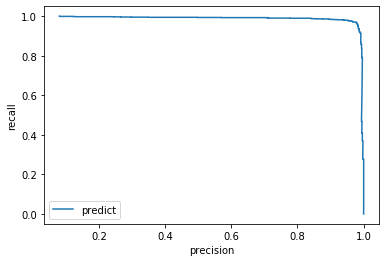

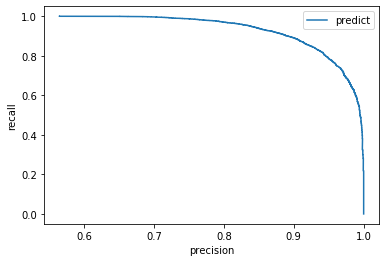

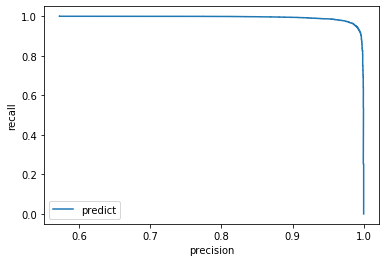

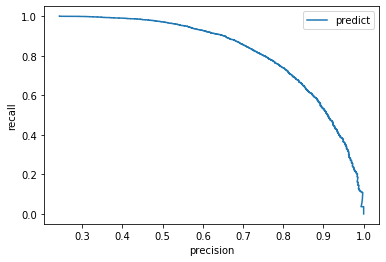

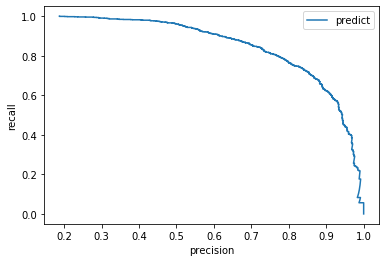

IndexError: list index out of range

In [363]:
import matplotlib.pyplot as plt
#plt.plot(x,y,label="fact")
for i in range(6):
    plt.plot(pr[i][0],pr[i][1],label="predict")
    plt.title("")
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.legend()
    plt.savefig(fname="result.png",figsize=[10,10])
    plt.show()
    #"Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necklace", "Wearing_Necktie"